# AllLife Credit Card Customer Segmentation

### Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

## STEP 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
# reading data into dataframe
credit= pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1')

In [3]:
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
credit.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [5]:
credit.shape

(660, 7)

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
credit.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [8]:
credit.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
credit.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [10]:
credit.drop_duplicates(subset=['Customer Key'], keep='last')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
5,6,58634,20000,3,0,1,8
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [11]:
##Remove Sl_No and Customer Key since it is redundant
credit.drop(['Sl_No', 'Customer Key'],  axis=1, inplace=True)

In [12]:
credit.info

<bound method DataFrame.info of      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  
0                      1                 0  
1                     10                 9  
2                      3                 4  
3                  

## STEP 2

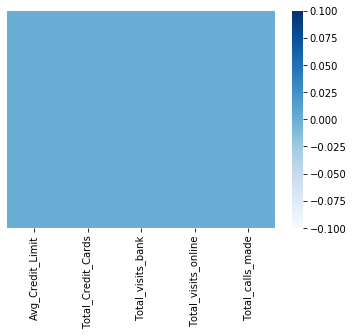

In [13]:
# Heatmap to visualize missing values in the data
sns.heatmap(credit.isnull(), cmap='Blues', yticklabels=False)
plt.show()

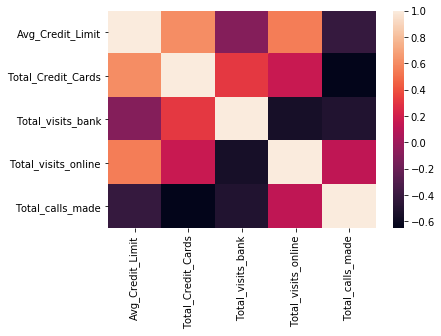

In [14]:
sns.heatmap(credit.corr())

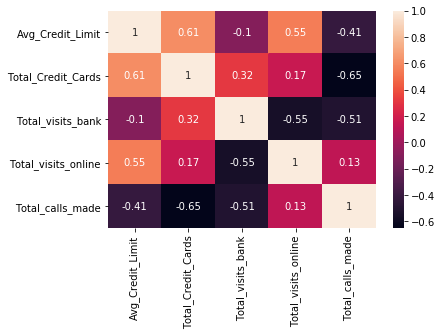

In [15]:
corr = credit.corr()
sns.heatmap(corr, annot = True)

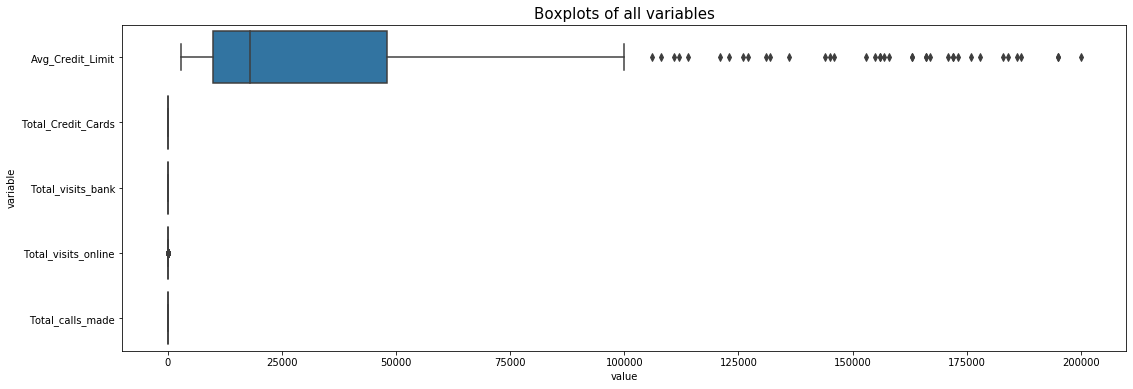

In [16]:
# Plotting Boxplots of all our features to get idea of distribution and outliers
plt.figure(figsize=(18,6))
sns.boxplot(x="value", y="variable", data=pd.melt(credit))
plt.title('Boxplots of all variables', size=15)
plt.show()

## Only Credit Limit has outliers and seems to be natural, and is possible.

In [17]:
credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [18]:
credit.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


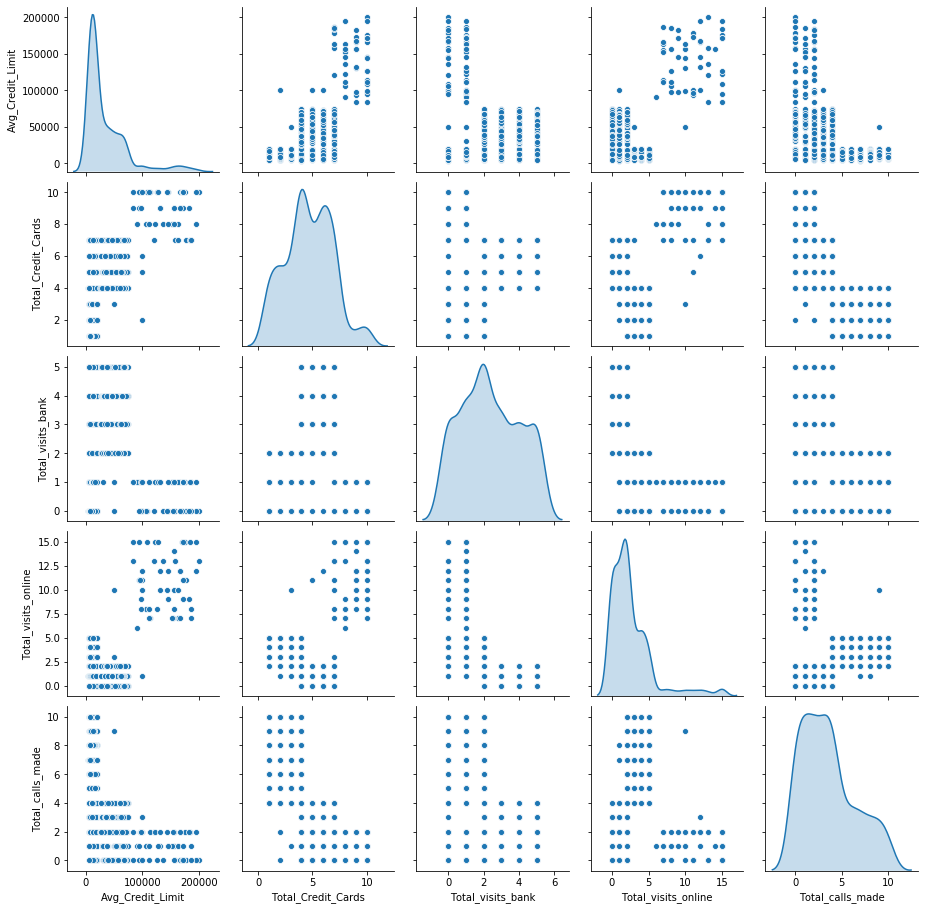

In [19]:
import seaborn as sns
sns.pairplot(credit, diag_kind='kde')

### Observations
### From diagonal plots we can see Avg_Credit_Limit' has 3 points
### Total_calls_made - shows two peaks majorily
### Total_Visit_bank shows 2 clusters and Total_visits_online shows 3

## Based on the kde plots, we can work with 2 or 3 clusters

## STEP 3

In [20]:
from sklearn.cluster import KMeans

from sklearn import metrics

# importing ploting libraries
import matplotlib.pyplot as plt 

In [21]:
##Scale the data
from scipy.stats import zscore

credit_z = credit.apply(zscore)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

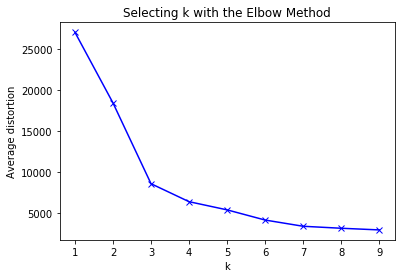

In [22]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(credit)
    prediction=model.predict(credit)
    meanDistortions.append(sum(np.min(cdist(credit, model.cluster_centers_, 'euclidean'), axis=1)) / credit
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [23]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [24]:
kmeans.fit(credit_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [25]:
centroids = kmeans.cluster_centers_

In [26]:
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [27]:
#Clculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(credit_z) )

In [28]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


In [29]:
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-0.595796,-0.021062,2.831764
Total_Credit_Cards,-1.059623,0.373690,1.862226
Total_visits_bank,-0.901518,0.666395,-1.105763
Total_visits_online,0.322997,-0.553672,2.827319
Total_calls_made,1.148109,-0.553005,-0.874330


In [30]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [31]:
# Joining the label dataframe with the data frame.
df_labeled = credit.join(df_labels)

In [32]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


In [33]:
df_labeled['labels'].value_counts() 

1    386
0    224
2     50
Name: labels, dtype: int64

In [34]:
# Let us try with K = 2 (to demonstrate the 3d plot using mplot3d)
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

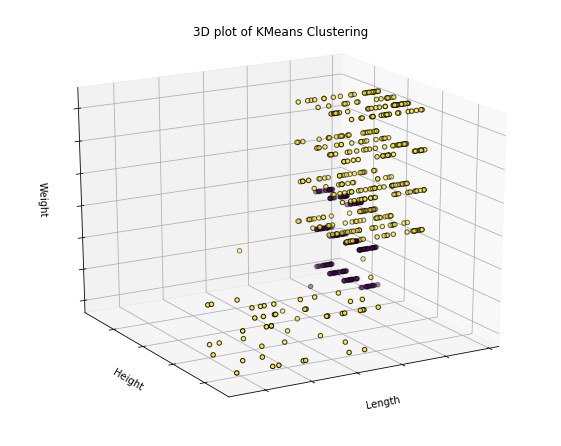

In [35]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(2)
k3_model.fit(credit_z)
labels = k3_model.labels_
ax.scatter(credit_z.iloc[:, 0], credit_z.iloc[:, 1], credit_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

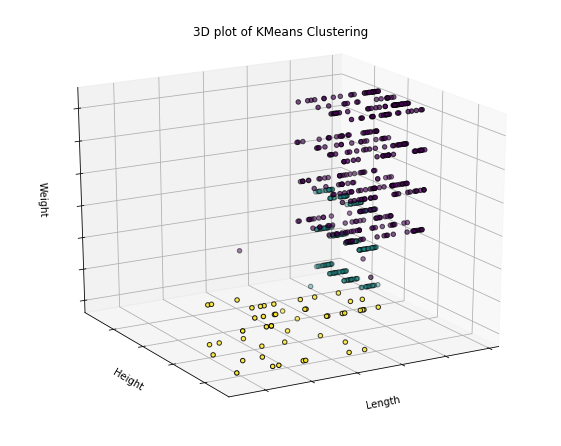

In [36]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(credit_z)
labels = k3_model.labels_
ax.scatter(credit_z.iloc[:, 0], credit_z.iloc[:, 1], credit_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [37]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[224 386  50]


In [38]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(credit_z) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-0.595796,-0.021062,2.831764
Total_Credit_Cards,-1.059623,0.373690,1.862226
Total_visits_bank,-0.901518,0.666395,-1.105763
Total_visits_online,0.322997,-0.553672,2.827319
Total_calls_made,1.148109,-0.553005,-0.874330


In [39]:
# Add cluster number to original credit data

predictions = kmeans.predict(credit_z)
predictions
credit["group"] = predictions
credit['group'] = credit['group'].astype('category')
credit.dtypes

Avg_Credit_Limit          int64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F3F905BC8>,
      dtype=object)

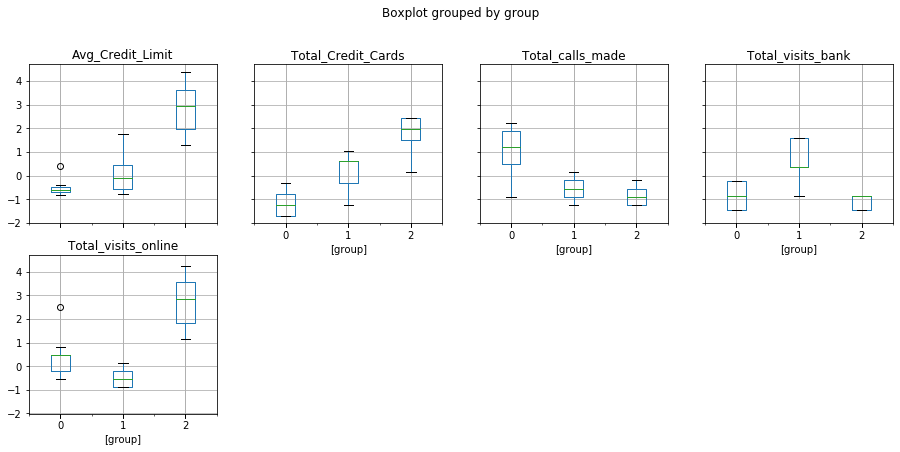

In [40]:
# Visualize the centers

credit_z["group"] = predictions
credit_z.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

## STEP4

In [41]:
# reading data into dataframe
credit= pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1')

In [42]:
interest_df = credit.drop(['Sl_No', 'Customer Key'], axis=1)

In [43]:
#method 1
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [44]:
# method 2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
credit_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)

In [45]:
credit_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### Find out the linkage matrix

#### Use ward as linkage metric and distance as Eucledian

In [46]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(credit_std, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [47]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

### Plot the dendrogram for the consolidated dataframe

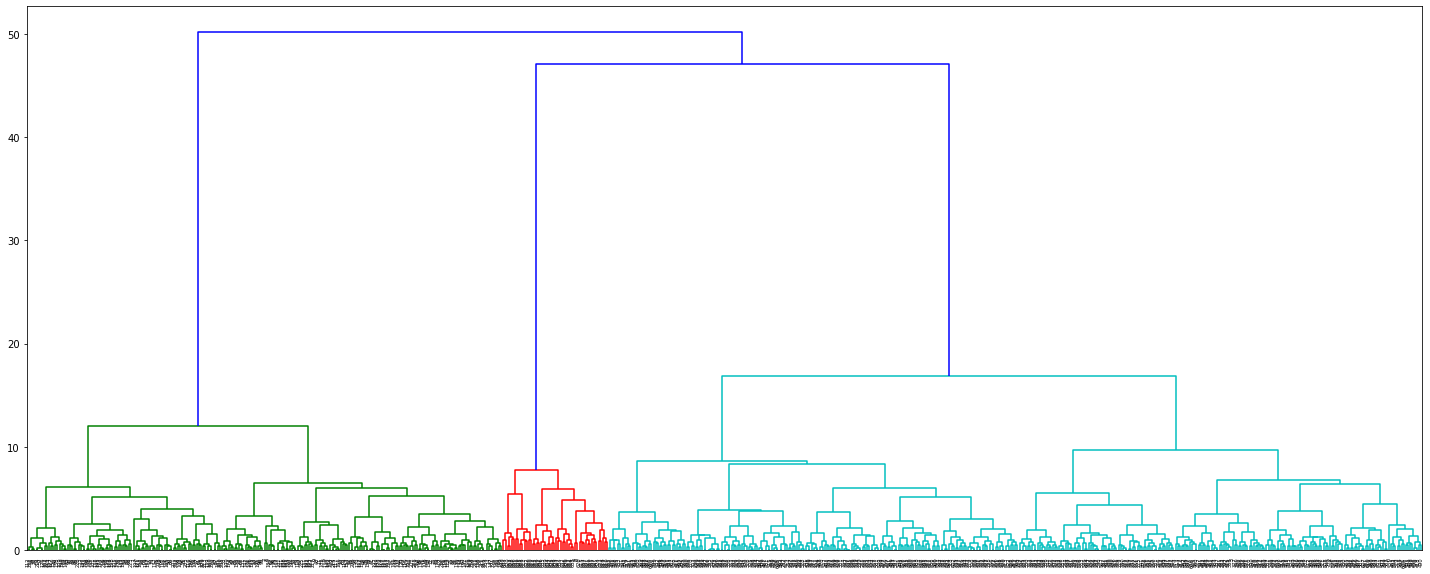

In [48]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

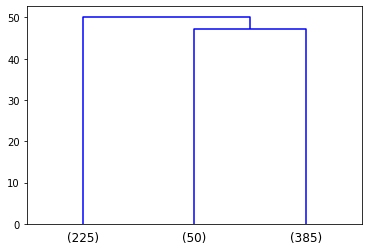

In [49]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [50]:
max_d = 48

### Use this distance measure(max_d) and fcluster function to cluster the data into 2 different groups

In [51]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [52]:
# Calculate Avg Silhoutte Score

from sklearn.metrics import silhouette_score
silhouette_score(credit_std,clusters)

0.417704147620949

Silhouette Score is better when closer 1 and worse when closer to -1

here, it is not so great but ok.

### Dendogram with 'ward linkage'

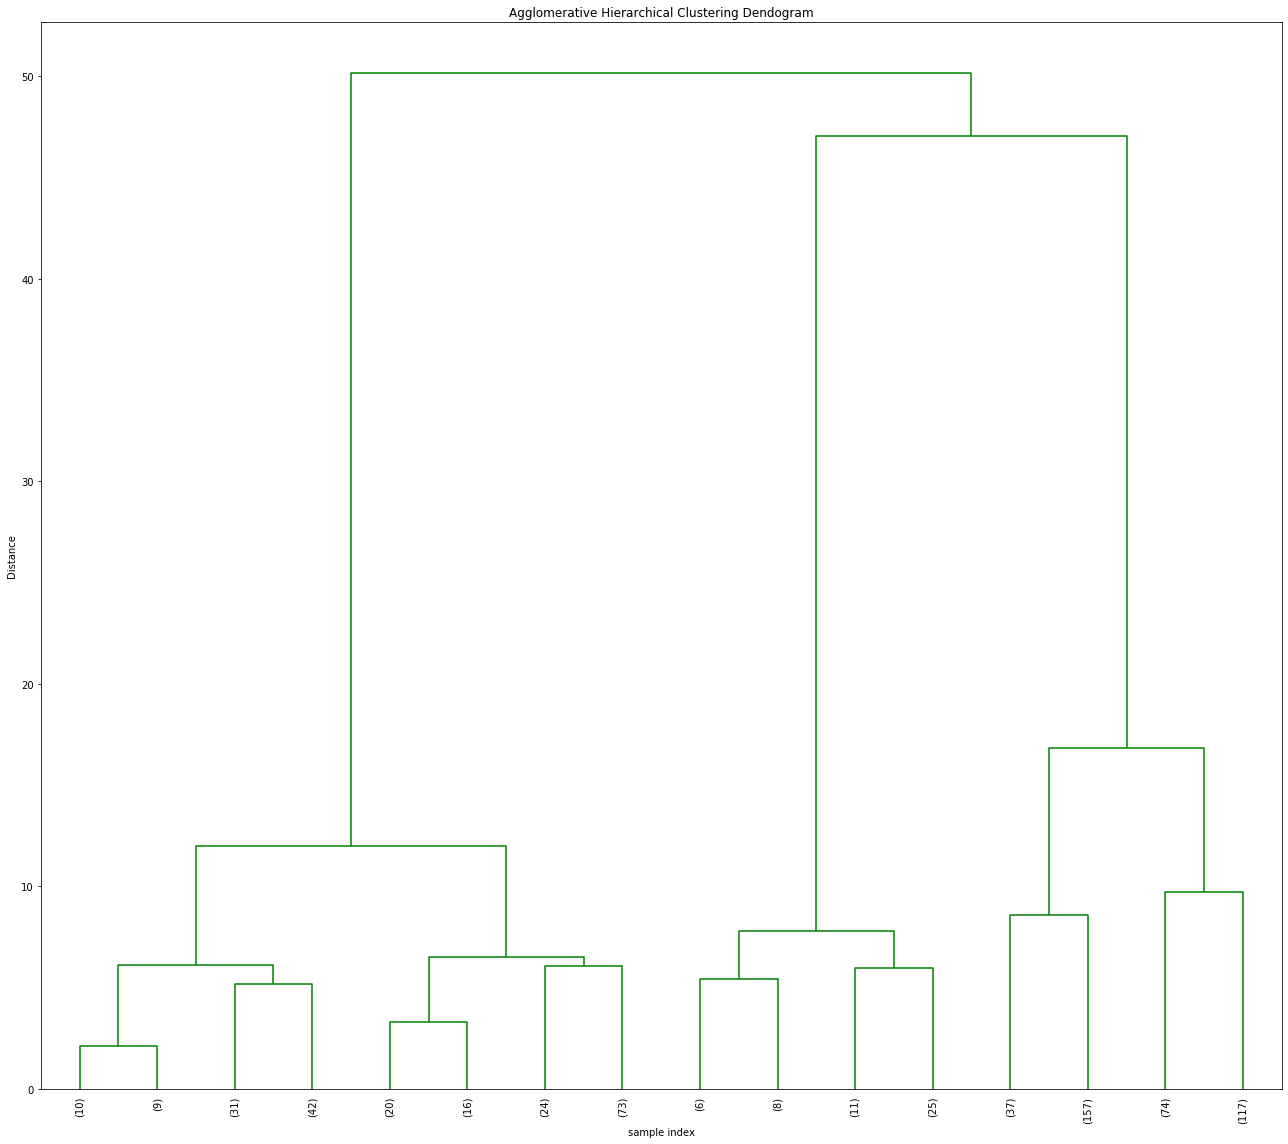

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(credit_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=3,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

The solution can be single based on the dendrogram. There is single cluster of one color (green). So, single segment solution is best.

In [54]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(interest_df)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
# plt.figure(figsize=(10, 7))
# plt.scatter(interest_df[:,0], interest_df[:,1], c=cluster.labels_, cmap='rainbow')
## Not Working??

In [56]:
from sklearn.cluster import AgglomerativeClustering 

In [57]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [58]:
model.fit(credit_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [59]:
interest_df['labels'] = model.labels_
interest_df.head(10)

#interest_df.groupby(["labels"]).count()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [60]:
creditDataClust = interest_df.groupby(['labels'])

In [61]:
creditDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12197.309417,2.403587,0.928251,3.560538,6.883408


In [62]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [63]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [64]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_std, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(credit_std))

c

0.8977080867389372

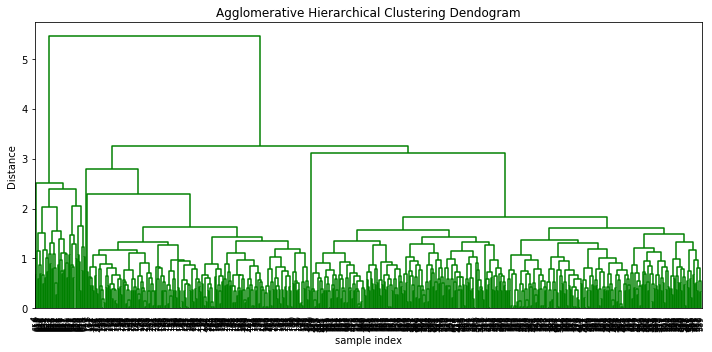

In [65]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [66]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_std, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(credit_std))

c

0.8599730607972423

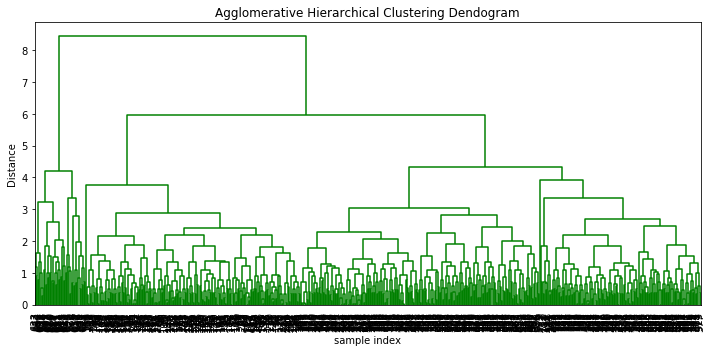

In [67]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [68]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(credit_std, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(credit_std))

c

0.7415156284827493

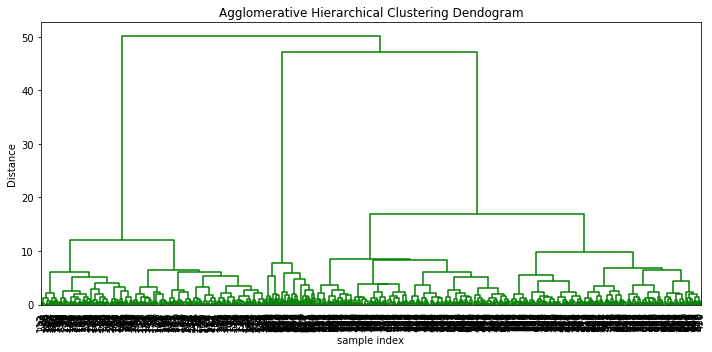

In [69]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [70]:
predictions = cluster.predict(credit_std)
predictions
interest_df["group"] = predictions
interest_df['group'] = interest_df['group'].astype('category')
interest_df.dtypes

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F3FE3B7C8>,
      dtype=object)

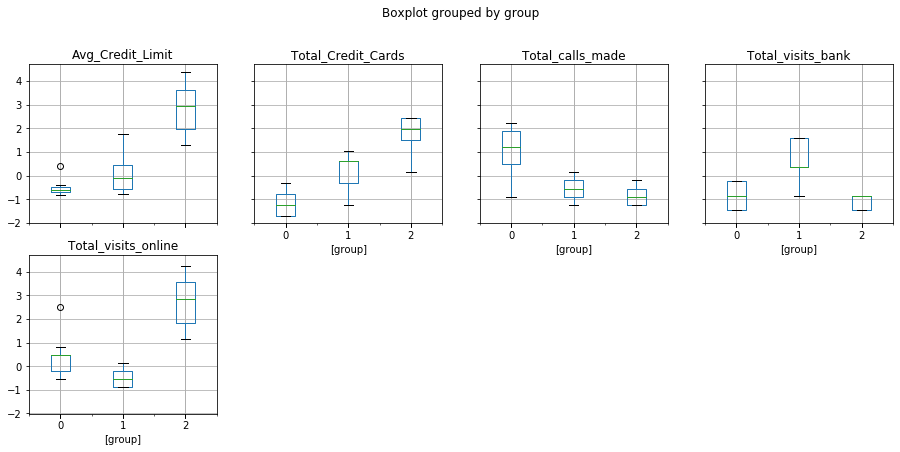

In [71]:
credit_std["group"] = predictions
credit_std.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

## STEP 5: Calculate Avg Silhoutte Score

In [72]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(credit_z,clusters)

0.4443853728009843

In [73]:
from sklearn.metrics import silhouette_score
silhouette_score(credit_std,clusters)

0.4443853728009843

In [74]:
from sklearn.decomposition import PCA

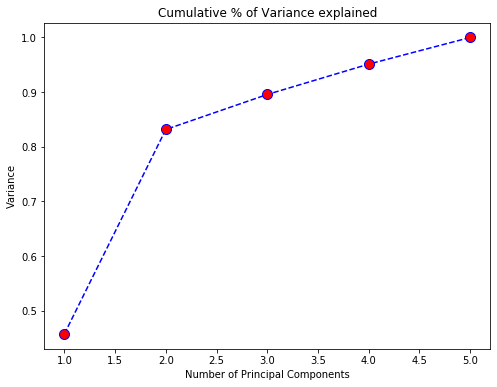

In [75]:
#Fitting the PCA algorithm to our data
pca = PCA().fit(interest_df_z)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(8,6))
plt.plot(list(range(1, interest_df_z.shape[1]+1)), np.cumsum(pca.explained_variance_ratio_), color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance') #for each component
plt.title('Cumulative % of Variance explained')
plt.show()

In [76]:
# Cumulative Variance values
print(np.cumsum(pca.explained_variance_ratio_))

[0.45736578 0.83163061 0.89564409 0.95121289 1.        ]


We could choose 3 principal component but we don't need to do dimensionality reduction, we just want independent features. We will use all 5 principal components.

In [77]:
# reading data into dataframe
credit_pca= pd.read_excel('Credit Card Customer Data.xlsx', sheet_name='Sheet1')

In [78]:
credit_pca.drop_duplicates(subset=['Customer Key'], keep='last')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
5,6,58634,20000,3,0,1,8
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [79]:
##Remove Sl_No and Customer Key since it is redundant
credit_pca.drop(['Sl_No', 'Customer Key'],  axis=1, inplace=True)

In [80]:
# method 2
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
credit_pca_std = pd.DataFrame(sc.fit_transform(credit_pca),columns=credit_pca.columns)

In [81]:
# PCA transformed dataset
cols=[]
for i in range(1,credit_pca.shape[1]+1):
    cols.append('PC_' + str(i))

df_pca = pca.fit_transform(credit_pca_std)
df_pca = pd.DataFrame(df_pca, columns=cols, index= credit_pca.index)
df_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,0.501291,0.524829,1.895862,1.200582,-1.277831
1,-1.459560,3.105588,-0.906802,0.411052,0.355547
2,0.525795,0.823979,0.089030,-1.033119,-0.196693
3,-0.362294,0.128123,0.558215,-0.729885,-0.320163
4,1.266228,3.668708,-0.099999,0.505571,0.724437


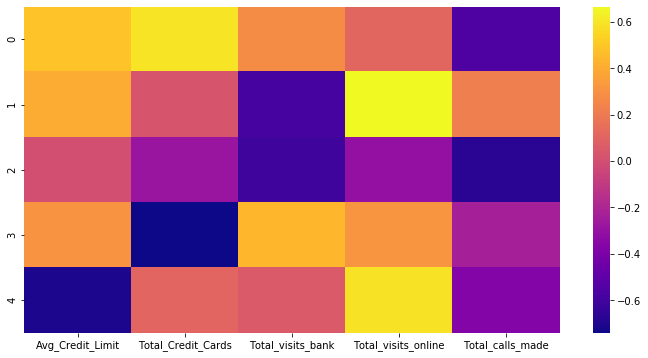

In [82]:
#Interpreting the share of each feature in forming the Principal Components
df_comp = pd.DataFrame(pca.components_, columns=credit_pca.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')
plt.show()

### K-means
Now we have Outliers and Correlated variables in check.

Another challenge with k-means is the Initial Centroid problem- We can get different clusters for different initial centroids.
Ways to deal with this inlcude, Multiple runs of k-means with different initial centroids and choosing the best set of clusters. Post-processing of the clusters (Example: Splitting loose clusters, merging small clusters, checking for empty clusters). Finding initial centroids using Bisecting k-means algorithm and then proceeding with k means.
Using kmeans++ algorithm for smart seeding. Also, kmeans can fail when natural clusters have non-globular shapes or are of different sizes or densities.

In [83]:
# Imports for kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [84]:
# Function to help us do cluster analysis using Silhouette plots and calculate the WSS (Within cluster Sum of Squared error)
# and Silhouette scores for different values of k (number of clusters).

def kmeans_analysis(df_kmeans, random_state=101):
    
    range_n_clusters = list(range(2,11))
    silhouette_scores = []
    wss = []
    
    # Taking 2 Principal Components for the dataset for purpose of visualization
    pca = PCA().fit(credit_pca_std)
    X = pca.fit_transform(credit_pca_std)
    
    # Looping through the values of k
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state= random_state)
        cluster_labels = clusterer.fit_predict(credit_pca_std)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(credit_pca_std, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", round(silhouette_avg,2))
        
        # Appending silhouette score and within cluster squared error to seperate lists for the particular k value
        silhouette_scores.append(silhouette_avg)
        wss.append(clusterer.inertia_)
        
        # Silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(credit_pca_std, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        ax2.set_title("Visualization of the clustered data on 1st and 2nd PC")
        ax2.set_xlabel("Feature space for PC_1")
        ax2.set_ylabel("Feature space for PC_2")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return silhouette_scores, wss

In [85]:
# Function to plot WSS and Silhouette scores vs No. of clusters
def make_plots(wss, silhouette_scores):
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
    
    ax1.plot(range(2, 11), wss, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
    ax1.set_title('Elbow method- WSS vs k', size=13)
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Within Cluster Sum of Squares (WSS)') #within cluster sum of squares
    
    ax2.plot(range(2, 11), silhouette_scores, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=8)
    ax2.set_title('Silhouette Scores vs k', size=13)
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Coefficient')
    
    plt.suptitle(('Choosing k value for kmeans'),
             fontsize=14, fontweight='bold')
    plt.show()

Silhouette coefficient: It takes into account both Cohesion and Seperation between clusters. It is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 

The Silhouette Coefficient for a sample is (b - a) / max(a, b)

For n_clusters = 2 The average silhouette_score is : 0.42
For n_clusters = 3 The average silhouette_score is : 0.52
For n_clusters = 4 The average silhouette_score is : 0.36
For n_clusters = 5 The average silhouette_score is : 0.27
For n_clusters = 6 The average silhouette_score is : 0.26
For n_clusters = 7 The average silhouette_score is : 0.25
For n_clusters = 8 The average silhouette_score is : 0.23
For n_clusters = 9 The average silhouette_score is : 0.22
For n_clusters = 10 The average silhouette_score is : 0.21


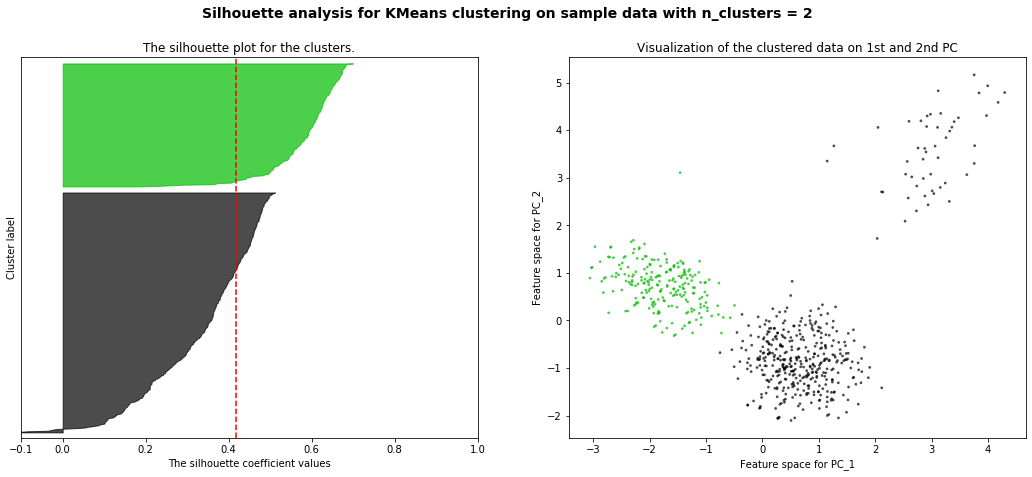

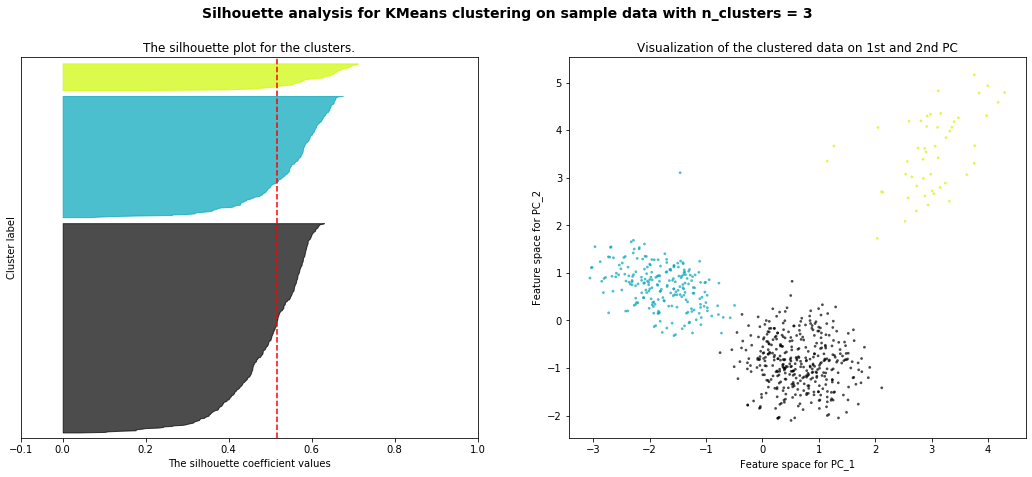

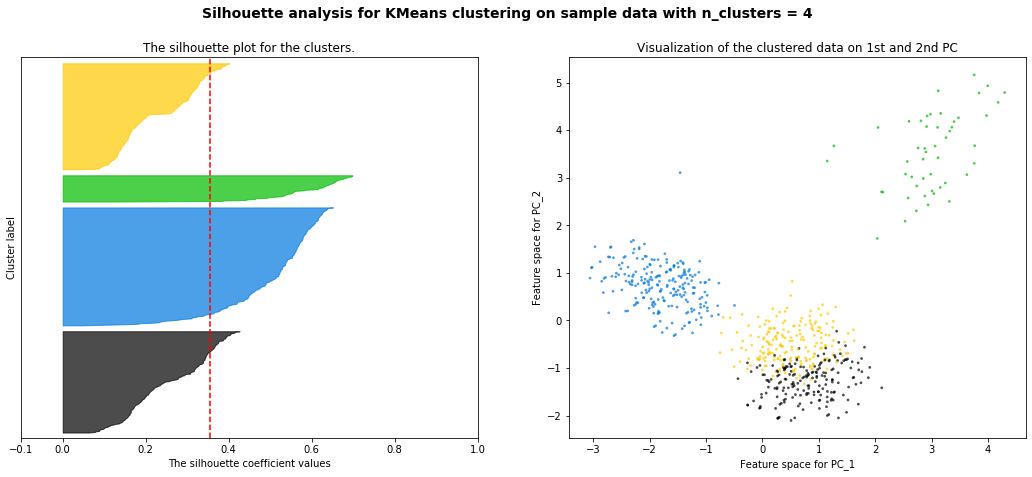

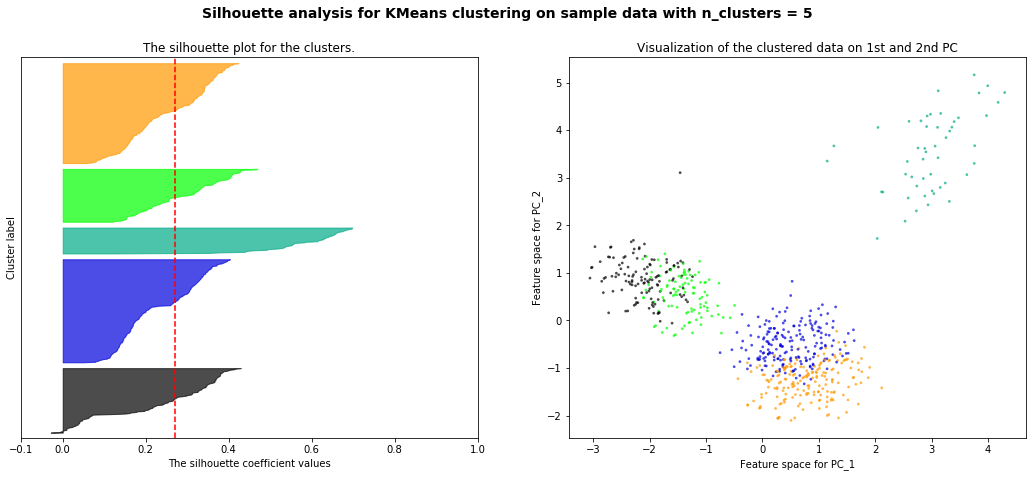

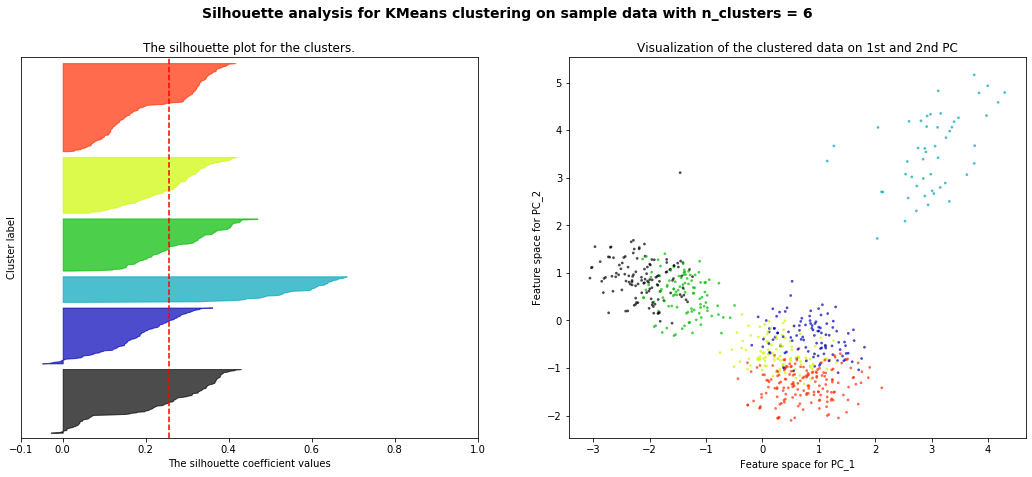

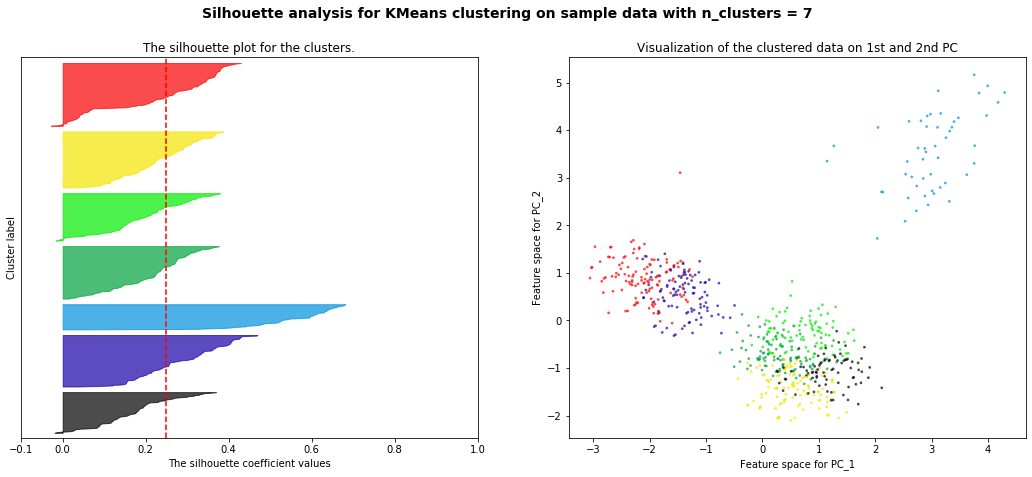

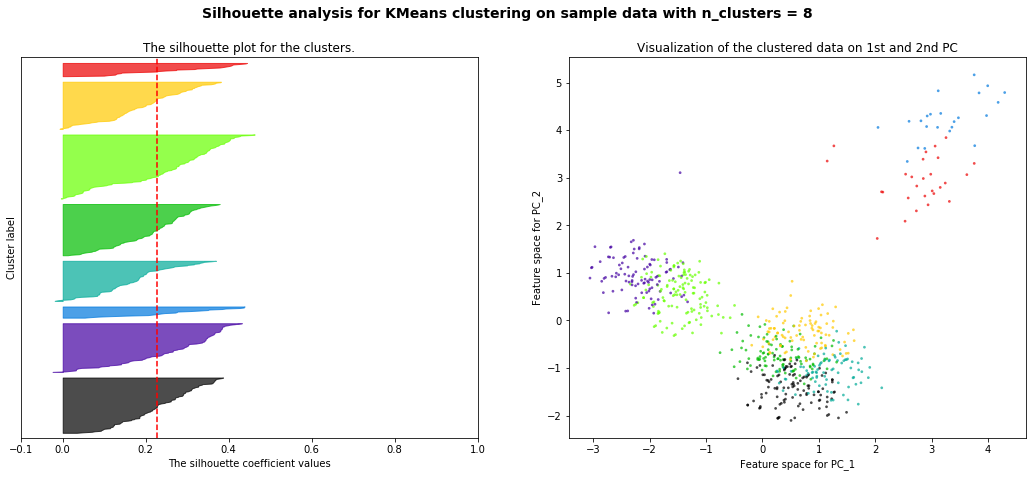

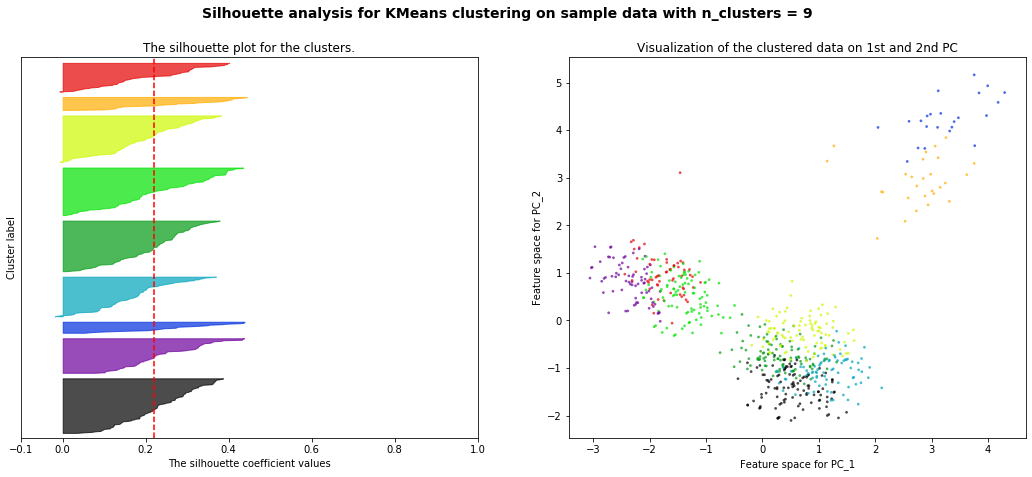

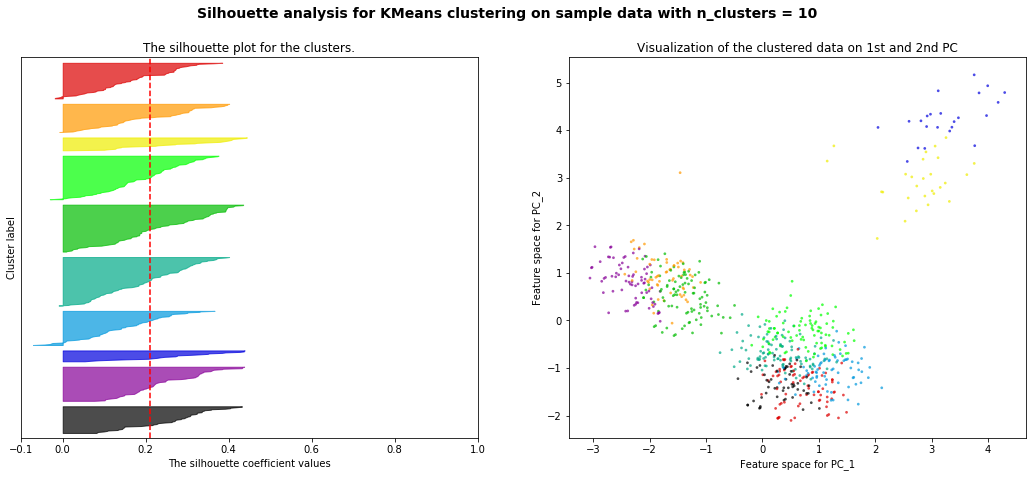

In [86]:
silhouette_scores, wss = kmeans_analysis(credit_pca_std)

## STEP 6: Compare K-means clusters with Hierarchical clusters

### Visual Comparison of Clustering

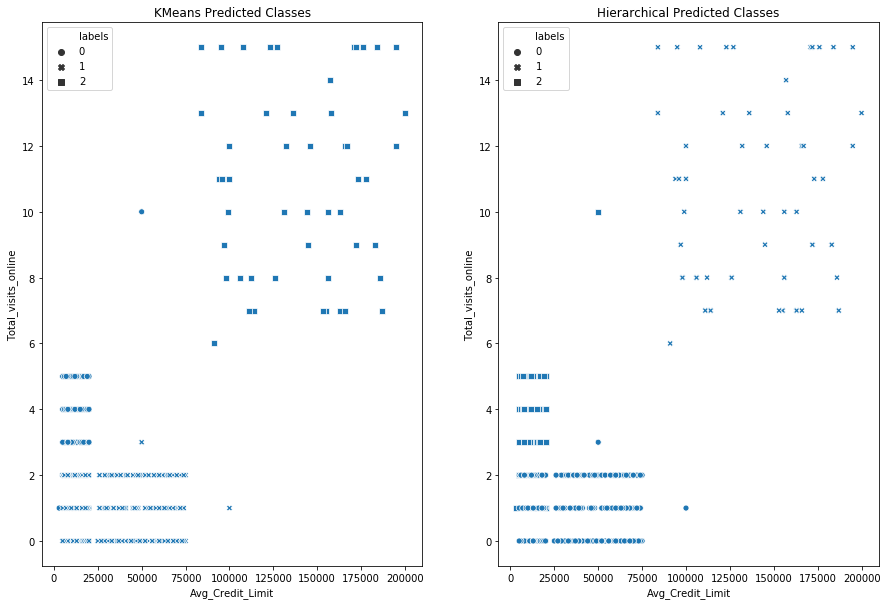

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,10))

ax1 = plt.subplot(1,2,1)
plt.title('KMeans Predicted Classes')
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online', style='labels', data=df_analysis,ax=ax1)

ax2 = plt.subplot(1,2,2)
plt.title('Hierarchical Predicted Classes')
sns.scatterplot(x='Avg_Credit_Limit', y='Total_visits_online', style = 'labels', data=interest_df, ax=ax2)

plt.show()

The results of both the clustering are almost similar to the same dataset.

It might be possible to see a difference, when we have a very large dataset and that shape of clusters may differ a little. 

However, along with many similarities, these two techniques have some differences as explained below 

K-Means Clustering is Centroid based, partition-based
Hierarchical Clustering is Hierarchical, Agglomerative


K-Means Clustering - the only centroid is considered to form clusters
Hierarchical Clustering - Top-down, bottom-up


K-Means Clustering - The Elbow method used to find clusters
Hierarchical Clustering - Dendrogram is used


## STEP 7: Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions

These clustering models were able to segment redit card users into distinctive groups. 
Some of these were fairly classical such as the prime segment, revolvers and transactors but we were also able to identify inactive users.

1. How many different segments of customers are there?
    2 or 3
2. How are these segments different from each other?
    K-Means Clustering is Centroid based, partition-based Hierarchical Clustering is Hierarchical, Agglomerative.
3. What are your recommendations to the bank on how to better market to and service these customers?
    Highest average credit limit customers are more visiting online than visiting bank and phone call, so providing faster online transactions will help this community.
    Least credit card holders are freequently callining the bank.
    Average credit card limit, holders are visiting bank more freequently.